drive mounted


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


setting up paths and generators

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

train_dir = '/content/drive/MyDrive/soil_split/train'
val_dir = '/content/drive/MyDrive/soil_split/val'

# Data Augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=16,
                                              class_mode='binary')

val_gen = val_datagen.flow_from_directory(val_dir,
                                          target_size=(150, 150),
                                          batch_size=16,
                                          class_mode='binary')


Found 7728 images belonging to 2 classes.
Found 1933 images belonging to 2 classes.


counting images

In [ ]:
import os

train_dir = '/content/drive/MyDrive/soil_split/train'

tilled_count = len(os.listdir(os.path.join(train_dir, 'tilled')))
untilled_count = len(os.listdir(os.path.join(train_dir, 'untilled')))

print(f"Tilled images: {tilled_count}")
print(f"Untilled images: {untilled_count}")


Tilled images: 3865
Untilled images: 3863


In [ ]:
import os

train_dir = '/content/drive/MyDrive/soil_split/val'

tilled_count = len(os.listdir(os.path.join(train_dir, 'tilled')))
untilled_count = len(os.listdir(os.path.join(train_dir, 'untilled')))

print(f"Tilled images: {tilled_count}")
print(f"Untilled images: {untilled_count}")


Tilled images: 967
Untilled images: 966


model training

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Paths
train_dir = '/content/drive/MyDrive/soil_split/train'
val_dir = '/content/drive/MyDrive/soil_split/val'

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Pretrained Base Model
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add Custom Top Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_path = "/content/drive/MyDrive/soil_mobilenetv2.h5"
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True)

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop, model_checkpoint]
)

# Save Final Model
model.save("/content/drive/MyDrive/final_soil_mobilenetv2.h5")


Found 7728 images belonging to 2 classes.
Found 1933 images belonging to 2 classes.


/tmp/ipython-input-9-1084361847.py:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


Epoch 1/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.8271 - loss: 0.4118

242/242 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.8273 - loss: 0.4113 - val_accuracy: 0.9157 - val_loss: 0.2078
Epoch 2/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.9145 - loss: 0.2128

242/242 ━━━━━━━━━━━━━━━━━━━━ 195s 806ms/step - accuracy: 0.9145 - loss: 0.2128 - val_accuracy: 0.9296 - val_loss: 0.1773
Epoch 3/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.9252 - loss: 0.1878

242/242 ━━━━━━━━━━━━━━━━━━━━ 186s 739ms/step - accuracy: 0.9252 - loss: 0.1878 - val_accuracy: 0.9421 - val_loss: 0.1568
Epoch 4/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.9323 - loss: 0.1648

242/242 ━━━━━━━━━━━━━━━━━━━━ 185s 762ms/step - accuracy: 0.9323 - loss: 0.1648 - val_accuracy: 0.9503 - val_loss: 0.1308
Epoch 5/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.9459 - loss: 0.1422

242/242 ━━━━━━━━━━━━━━━━━━━━ 188s 778ms/step - accuracy: 0.9459 - loss: 0.1422 - val_accuracy: 0.9576 - val_loss: 0.1282
Epoch 6/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.9393 - loss: 0.1441

242/242 ━━━━━━━━━━━━━━━━━━━━ 196s 752ms/step - accuracy: 0.9393 - loss: 0.1441 - val_accuracy: 0.9529 - val_loss: 0.1172
Epoch 7/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.9463 - loss: 0.1382

242/242 ━━━━━━━━━━━━━━━━━━━━ 180s 742ms/step - accuracy: 0.9463 - loss: 0.1382 - val_accuracy: 0.9576 - val_loss: 0.1112
Epoch 8/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 177s 732ms/step - accuracy: 0.9494 - loss: 0.1260 - val_accuracy: 0.9545 - val_loss: 0.1160
Epoch 9/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.9524 - loss: 0.1218

242/242 ━━━━━━━━━━━━━━━━━━━━ 173s 714ms/step - accuracy: 0.9524 - loss: 0.1218 - val_accuracy: 0.9643 - val_loss: 0.0954
Epoch 10/10
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.9473 - loss: 0.1359

242/242 ━━━━━━━━━━━━━━━━━━━━ 183s 758ms/step - accuracy: 0.9473 - loss: 0.1358 - val_accuracy: 0.9653 - val_loss: 0.0922


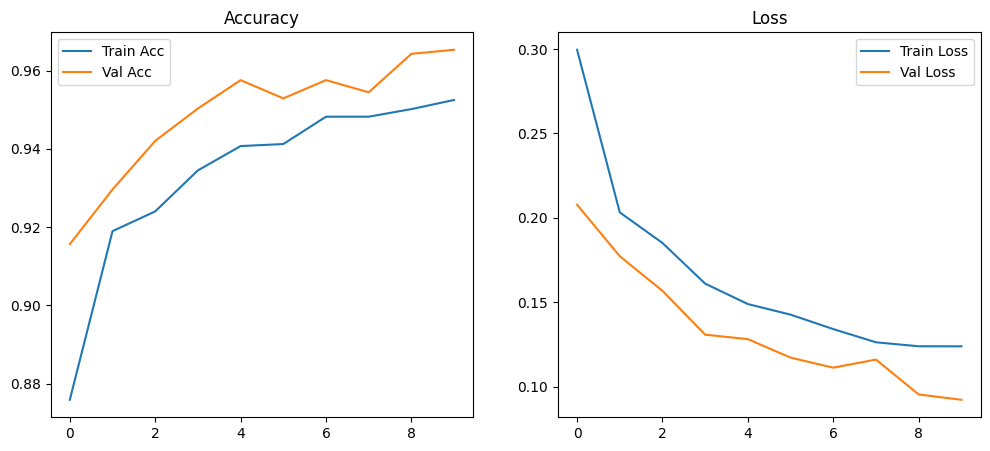

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Train Acc')
plt.plot(epochs, val_acc, label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


testing

Found 1933 images belonging to 2 classes.
61/61 ━━━━━━━━━━━━━━━━━━━━ 32s 508ms/step


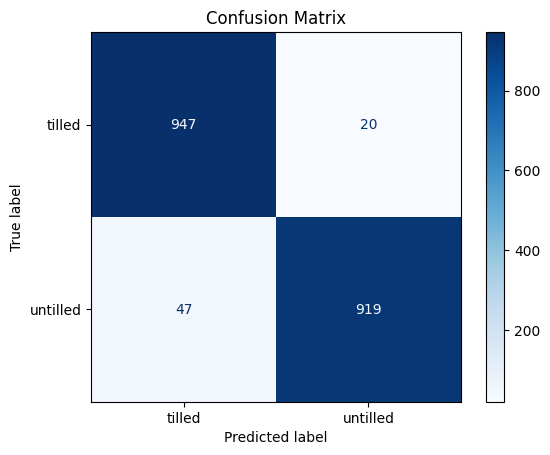

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load the saved model
model = load_model('/content/drive/MyDrive/final_soil_mobilenetv2.h5')

# 2. Recreate the validation generator (without shuffle for correct ordering)
val_gen_cm = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 3. Predict on validation set
y_pred_probs = model.predict(val_gen_cm)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)  # Binary prediction
y_true = val_gen_cm.classes  # True labels

# 4. Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_gen_cm.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix values
#          Pred_Tilled  Pred_Untilled
# True_Tilled     947          20
# True_Untilled    47         919

y_true = ['Tilled'] * 967 + ['Untilled'] * 966  # Total = 1933
y_pred = (
    ['Tilled'] * 947 + ['Untilled'] * 20 +  # True Tilled predictions
    ['Tilled'] * 47 + ['Untilled'] * 919    # True Untilled predictions
)

# Classification report
report = classification_report(y_true, y_pred, target_names=['Tilled', 'Untilled'])
print(report)


              precision    recall  f1-score   support

      Tilled       0.95      0.98      0.97       967
    Untilled       0.98      0.95      0.96       966

    accuracy                           0.97      1933
   macro avg       0.97      0.97      0.97      1933
weighted avg       0.97      0.97      0.97      1933



In [ ]:
from tensorflow.keras.models import load_model

# Load the existing model
model_path = '/content/drive/MyDrive/final_soil_mobilenetv2.h5'
model = load_model(model_path)
model.save('/content/drive/MyDrive/final_soil_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: untilled
Confidence: 78.43%


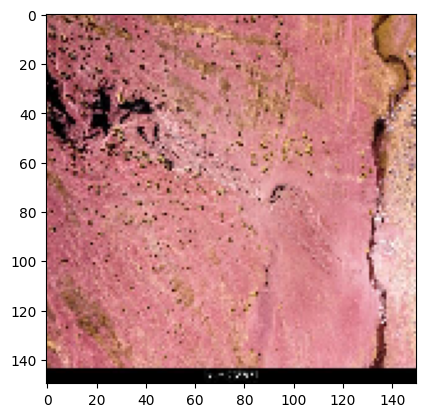

In [27]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = load_model('/content/drive/MyDrive/final_soil_model.keras')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/soil_split/train/untilled/tin2.jpg'  # Change as needed
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Use MobileNetV2's preprocessing

# Predict
prediction = model.predict(img_array)[0][0]
confidence = prediction * 100
plt.imshow(img)
# Decide label
predicted_label = "tilled" if prediction < 0.5 else "untilled"

# Show result
print(f"Predicted label: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted label: tilled
Confidence: 17.89%


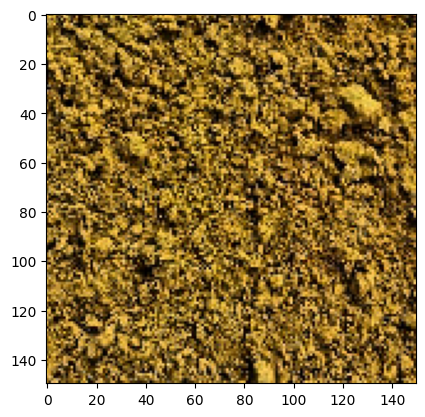

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = load_model('/content/drive/MyDrive/final_soil_model.keras')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/soil_split/train/tilled/fin4.jpg'  # Change as needed
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Use MobileNetV2's preprocessing

# Predict
prediction = model.predict(img_array)[0][0]
confidence = prediction * 100
plt.imshow(img)
# Decide label
predicted_label = "tilled" if prediction < 0.5 else "untilled"

# Show result
print(f"Predicted label: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")


In [38]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ----- Path Setup -----
untilled_path = "/content/drive/MyDrive/soil_split/train/tilled"
class_names = ['tilled', 'untilled']  # Assuming binary classification

# ----- Number of Images to Predict -----
num_images = 9  # Change this if needed

# ----- Collect Random Untilled Images -----
image_paths = random.sample(os.listdir(untilled_path), num_images)

# ----- Plot and Predict -----
plt.figure(figsize=(15, 15))
for idx, img_file in enumerate(image_paths):
    img_path = os.path.join(untilled_path, img_file)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array_expanded)[0]
    predicted_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    # Plot image with prediction info
    plt.subplot(3, 3, idx + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Actual: tilled\nPred: {predicted_class}\nConf: {confidence:.2f}", fontsize=10)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [41]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to 'untilled' images
untilled_path = "/content/drive/MyDrive/soil_split/train/untilled"
class_names = ['tilled', 'untilled']  # Must match train_gen.class_indices order

# Select random images
num_images = 9
image_files = random.sample(os.listdir(untilled_path), num_images)

plt.figure(figsize=(15, 15))
for idx, img_file in enumerate(image_files):
    img_path = os.path.join(untilled_path, img_file)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict (binary output)
    pred = model.predict(img_array_expanded)[0]

    predicted_class = class_names[1] if pred > 0.5 else class_names[0]
    confidence = pred.item() if pred > 0.5 else 1 - pred.item

    # Display
    plt.subplot(3, 3, idx + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Actual: untilled\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}", fontsize=10)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.